[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/storopoli/ciencia-de-dados/master?filepath=notebooks%2FAula_6_Numpy_Algebra_Linear.ipynb)
<br>
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/master/notebooks/Aula_6_Numpy_Algebra_Linear.ipynb)

# Algebra Linear e `NumPy`

**Objetivos**: Rever conceitos de Álgebra Linear e apresentar a biblioteca `NumPy`.

Recomendo assistirem a série *Essence of Linear Algebra* do canal do YouTube [3blue1brown](https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw)



[<img src="https://i.ytimg.com/vi/kjBOesZCoqc/maxresdefault.jpg" alt="Essence of Linear Algebra" style="width: 300px;"/>](https://www.youtube.com/playlist?list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab)

## Notação

Matriz $\mathbf{A} \in \mathbb{R}^{m \times n}$

Vetor $\vec{v} \in \mathbb{R}^{n}$

## Matriz

Matriz $\mathbf{A} \in \mathbb{R}^{2 \times 3}$

$$\mathbf{A} = \left[\begin{array}{lll}{1} & {2} & {3} \\ {4} & {5} & {6}\end{array}\right]$$

## Vetor
Vetor $\vec{v} \in \mathbb{R}^{3}$

$$\vec{v} = \left[\begin{array}{l}{1} \\ {2} \\ {3}\end{array}\right]$$


In [1]:
import numpy as np
A = np.array([[1,2,3],
              [4,5,6]])
v = np.array([1,
              2,
              3])
print(A)
print(v)

[[1 2 3]
 [4 5 6]]
[1 2 3]


## Multiplicação de Matrizes

O produto $\mathbf{AB}$ das matrizes $\mathbf{A} \in \mathbb{R}^{m \times \ell}$ e $\mathbf{B} \in \mathbb{R}^{\ell \times n}$ consiste em computar o produto entre cada linha da $\mathbf{A}$ com cada coluna de $\mathbf{B}$:

$$\mathbf{C}=\mathbf{A} \mathbf{B} \quad \Leftrightarrow \quad c_{i j}=\sum_{k=1}^{\ell} a_{i k} b_{k j}, \forall i \in[1, \ldots, m], j \in[1, \ldots, n].$$

$$\left[\begin{array}{ll}{a_{11}} & {a_{12}} \\ {a_{21}} & {a_{22}} \\ {a_{31}} & {a_{32}}\end{array}\right]\left[\begin{array}{ll}{b_{11}} & {b_{12}} \\ {b_{21}} & {b_{22}}\end{array}\right]=\left[\begin{array}{ll}{a_{11} b_{11}+a_{12} b_{21}} & {a_{11} b_{12}+a_{12} b_{22}} \\ {a_{21} b_{11}+a_{22} b_{21}} & {a_{21} b_{12}+a_{22} b_{22}} \\ {a_{31} b_{11}+a_{32} b_{21}} & {a_{31} b_{12}+a_{32} b_{22}}\end{array}\right] \in \mathbb{R}^{3 \times 2}.$$


![matrix-multiplication](https://f0.pngfuel.com/png/267/924/matrix-multiplication-field-row-the-matrix-png-clip-art.png)

### Multiplicação de Vetor por Matriz

$$\textbf{A} \vec{x}=\left[\begin{array}{ccc}
1 & 4 & 5 \\
3 & 2 & 5 \\
2 & 1 & 3
\end{array}\right]\left[\begin{array}{c}
x_{1} \\
x_{2} \\
x_{3}
\end{array}\right]=\left[\begin{array}{c}
1 \\
3 \\
2
\end{array}\right] x_{1}+\left[\begin{array}{c}
4 \\
2 \\
1
\end{array}\right] x_{2}+\left[\begin{array}{c}
5 \\
5 \\
3
\end{array}\right] x_{3}$$

In [2]:
A = np.array([[3,0],
              [0,5],
              [1,5]])
B = np.array([[3,0],
              [0,5]])

np.dot(A,B)

array([[ 9,  0],
       [ 0, 25],
       [ 3, 25]])

## *Digressão* - Por que Matrizes são Importantes?

Todo dado estruturado é representado como matrizes no computador. Veja o caso de imagens. Elas são literalmente matrizes multidimensionais.

* Uma imagem colorida é uma Array de dimensão $X \times Y \times 3$:
    * $X$ = quantidade de pixels no eixo horizontal
    * $y$ = quantidade de pixels no eixo vertical
    * $3$ = são 3 canais de cores - **R**ed, **G**reen e **B**lue

<img src="images/images_as_matrix.png" alt="Row vs Cols" style="width: 500px;"/>

(562, 450)


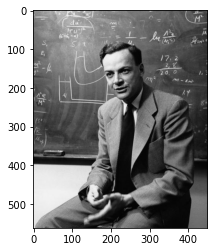

In [3]:
import matplotlib.pyplot as plt
feynman = plt.imread("images/feynman.png")
print(feynman.shape)
plt.imshow(feynman, cmap='gray')

### Convoluções

<img src="images/convolution.gif" alt="Row vs Cols" style="width: 400px;"/>

In [4]:
from scipy.signal import convolve

### Filtros

Temos vários. Veja essa [página na Wikipedia](https://en.wikipedia.org/wiki/Kernel_(image_processing)).

#### Detecção de Bordas (*Edge Detection*)

$$
\left[\begin{array}{lll}
{-1} & {-1} & {-1} \\
{-1} & {+8} & {-1} \\
{-1} & {-1} & {-1}
\end{array}\right]
$$

In [5]:
edge_detect = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]]) 

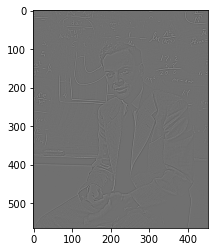

In [6]:
feynman_edge = convolve(feynman, edge_detect)
plt.imshow(feynman_edge, cmap='gray')

#### Aumento de Nitidez (*Sharpen*)

$$
\left[\begin{array}{lll}
{0} & {-1} & {0} \\
{-1} & {+5} & {-1} \\
{0} & {-1} & {0}
\end{array}\right]
$$

In [7]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]]) 

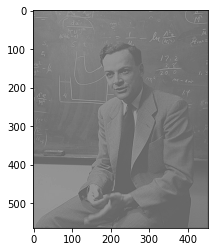

In [8]:
feynman_sharpen = convolve(feynman, sharpen)
plt.imshow(feynman_sharpen, cmap='gray')

#### Desfoque (*Blur*)

$$
\frac{1}{16}
\left[\begin{array}{lll}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{array}\right]
$$

In [9]:
blur = np.array([[1, 2, 1],
                 [2, 4, 2],
                 [1, 2, 1]]) / 16

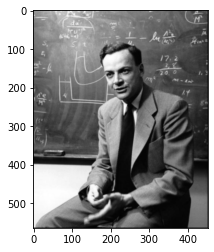

In [10]:
feynman_blur = convolve(feynman, blur)
plt.imshow(feynman_blur, cmap='gray')

## Matriz Transposta

A matriz transposta $\mathbf{A}^T$ é definida pela fórmula $a{^T}_{ij} = a_{ji}$. Em outras palavras, obtemos a transposição por “virar” a matriz pela sua diagonal:

$$^{T}: \mathbb{R}^{m \times n} \rightarrow \mathbb{R}^{n \times m}$$

$$\left[\begin{array}{lll}{\alpha_{1}} & {\alpha_{2}} & {\alpha_{3}} \\ {\beta_{1}} & {\beta_{2}} & {\beta_{3}}\end{array}\right]^{\top}=\left[\begin{array}{ll}{\alpha_{1}} & {\beta_{1}} \\ {\alpha_{2}} & {\beta_{2}} \\ {\alpha_{3}} & {\beta_{3}}\end{array}\right]$$

In [11]:
A = np.array([[1,2,3],
              [4,5,6]])

A.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## Determinante
A determinante de uma matriz é um procedimento que envolve todos os elementos da matriz, e que o resultado é um número único:

$$\operatorname{det}: \mathbb{R}^{n \times n} \rightarrow \mathbb{R}.$$

A determinante descreve a geometria relativa dos vetores que fazem as linhas de uma matriz. Mais especificamente, a determinante de uma matriz $\mathbf{A}$ diz respeito sobre o *volume* de uma caixa com os lados dados pelas linhas de $\mathbf{A}$.

A determinante de uma matriz $2 \times 2$ é:

$$\operatorname{det}(\mathbf{A})=\operatorname{det}\left(\left[\begin{array}{ll}{a} & {b} \\ {c} & {d}\end{array}\right]\right)=\left|\begin{array}{ll}{a} & {b} \\ {c} & {d}\end{array}\right|=a d-b c$$

In [12]:
A = np.array([[1,2],
              [3,4]])
np.linalg.det(A)

-2.0000000000000004

## Matrizes e Vetores no NumPy

Todas as matrizes e vetores são chamadas de `arrays` no NumPy

### Criando `array`

In [13]:
A = np.array([[1,2,3],
              [4,5,6]])
A

array([[1, 2, 3],
       [4, 5, 6]])

$$\left[\begin{array}{lll}{0} & {0} & {0} \\ {0} & {0} & {0}\end{array}\right]$$

In [14]:
A = np.zeros((2,3))
A

array([[0., 0., 0.],
       [0., 0., 0.]])

$$\left[\begin{array}{lll}{1} & {1} & {1} \\ {1} & {1} & {1}\end{array}\right]$$

In [15]:
A = np.ones((2,3))
A

array([[1., 1., 1.],
       [1., 1., 1.]])

$$I_3 = \left[\begin{array}{lll}{1} & {0} & {0} \\ {0} & {1} & {0} \\ {0} & {0} & {1} \end{array}\right]$$

In [16]:
A = np.eye(3)
A

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

#### Intervalar

In [17]:
A = np.arange(1, 6, 1)
A

array([1, 2, 3, 4, 5])

In [18]:
A = np.linspace(0, 2, 9) # 9 números de 0 a 2
A

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [19]:
A = np.arange(6) # 1-D
print('A = ', A)

B = np.arange(12).reshape(4,3) # 2-D
print('B = ', B)

C = np.arange(24).reshape(2,3,4) # 3-D
print('C = ', C)

A =  [0 1 2 3 4 5]
B =  [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
C =  [[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


#### Randômicos

In [20]:
A = np.random.rand(3, 2) # float entre 0 e 1
A

array([[0.7904658 , 0.24399984],
       [0.37503525, 0.90156297],
       [0.35326961, 0.85301751]])

In [21]:
A = np.random.randint(1, 10, size = (3, 2)) # int entre 1 e 9
A

array([[5, 5],
       [6, 9],
       [1, 8]])

In [22]:
A = np.random.uniform(1, 10, size = (3, 2)) # float entre 1 e 9
A

array([[1.15771651, 8.1796702 ],
       [9.28153176, 8.72154934],
       [1.83304142, 7.66315437]])

In [23]:
A = np.random.normal(0, scale = 1, size = (3,2)) # normal media 0 e dp 1
A

array([[-1.37807511,  0.96187341],
       [-0.25878498, -0.9096165 ],
       [ 0.469069  , -0.43408857]])

### Propriedades de `array`

In [24]:
A = np.array([[1,2,3],
              [4,5,6]])

In [25]:
A.ndim

2

In [26]:
A.shape

(2, 3)

In [27]:
A.size

6

### Operações de `array`

In [28]:
a = np.array([20,30,40,50])
b = np.array([0, 1, 2, 3])

a - b

array([20, 29, 38, 47])

In [29]:
b**2

array([0, 1, 4, 9])

In [30]:
a < 35

array([ True,  True, False, False])

#### Multiplicações

In [31]:
A = np.array([[1,1],
              [0,1]])
B = np.array([[2,0],
              [3,4]])

In [32]:
A * B # multiplicação elemento-por-elemento

array([[2, 0],
       [0, 4]])

In [33]:
A.dot(B) # multiplicação de Matriz

array([[5, 4],
       [3, 4]])

#### Operações Matemáticas

In [34]:
B = np.array([1,2,3])

print(np.exp(B))
print(np.sqrt(B))
print(np.log(B))

[ 2.71828183  7.3890561  20.08553692]
[1.         1.41421356 1.73205081]
[0.         0.69314718 1.09861229]


### Indexando e fatiando `array`

Arrays 1-D podem ser indexadas, fatiadas e iteradas que nem `list` e outras sequências Python

In [35]:
A = np.array([1,2,3,4,5,6,7,8,9,10])

print(A[2]) # terceiro elemento
print(A[2:5]) # terceiro a quinto
print(A[:6:2]) # primeiro a sexto elemento a cada 2 elementos

3
[3 4 5]
[1 3 5]


#### `arrays` Multidimensionais
`arrays` N-D ($N>1$) podem ser indexadas por eixo

In [36]:
A = np.array([[1,2,3],
              [4,5,6],
              [7,8,9]])

print(A[1, 0]) # segunda linha, primeira coluna
print(A[:2, 1]) # primeira à segunda linha, apenas da segunda coluna

4
[2 5]


## Observação

Matrizes e Arrays em `NumPy` são *Row Major* e não *Column Major*. Ou seja a memória é alocada de maneira contígua usando uma lógica de linhas (*rows*) ao invés de colunas (*columns*).

* Geralmente linguagens de computação voltadas para computação científica são *Column Major*: `R`, `Fortran` e `Julia`.

* Geralmente linguagens de computação que tem uma relação muito próxima com `C` ou `C++` como `Python` são *Row Major*.

<img src="images/row-vs-cols_1.png" alt="Row vs Cols" style="width: 300px;"/>

<img src="images/row-vs-cols_2.png" alt="Row vs Cols" style="width: 300px;"/>

Então se você tiver que percorrer uma `np.ndarray` (Array `NumPy`) sempre faça primeiro pela linha (*row*) do que coluna (*column*):

In [37]:
def col_iter(x):
    s = 0
    for i in range(0, x.shape[1]):
        for j in range(0, x.shape[0]):
            s = s + x[j, i] ** 2
            x[j, i] = s

In [38]:
def row_iter(x):
    s = 0
    for i in range(0, x.shape[0]):
        for j in range(0, x.shape[1]):
            s = s + x[i, j] ** 2
            x[i, j] = s

In [39]:
import numpy as np
np.random.seed(123)
A = np.random.rand(1000, 1000)

In [40]:
%timeit col_iter(A)

<ipython-input-37-f6c23a03a226>:5: RuntimeWarning: overflow encountered in double_scalars
  s = s + x[j, i] ** 2


315 ms ± 80.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
%timeit row_iter(A)

<ipython-input-38-752f40889343>:5: RuntimeWarning: overflow encountered in double_scalars
  s = s + x[i, j] ** 2


250 ms ± 1.92 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
